# To preface this, I used Manav Sehgal notebook to guide me through this Kaggle Project - find his here: https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

In [1012]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os.path

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [1013]:
DATA_DIR = os.path.join("..", "Kaggle", "Datasets", "titanic_train.csv")
!ls {DATA_DIR}
DATA_DIR2 = os.path.join("..", "Kaggle", "Datasets", "titanic_test.csv")
!ls {DATA_DIR2}

../Kaggle/Datasets/titanic_train.csv
../Kaggle/Datasets/titanic_test.csv


In [1014]:
train_df = pd.read_csv(os.path.join(DATA_DIR))
test_df = pd.read_csv(os.path.join(DATA_DIR2)) #contains all the variables, except "Survived"

In [1015]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [1016]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1017]:
train_df.describe() #this only shows us the integer variables 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1018]:
#A couple of takeaway points:
#Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
#Around 38% samples survived representative of the actual survival rate at 32%.
#Fares varied significantly with few passengers (<1%) paying as high as $512.
#Few elderly passengers (<1%) within age range 65-80.

In [1019]:
train_df.describe(include=['O']) #this shows us non-integer variables

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Somerton, Mr. Francis William",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [1020]:
#More takeaway points: 
#Names are unique across the dataset (count=unique=891)
#Sex variable as two possible values with 65% male (577/891).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (22%) of duplicate values (unique=681)

# EDA - which features are most important to use? 

In [1021]:
#Now, we are going to do some EDA - and see if Pclass, Sex, and SibSp and Parch have strong relationships with survival

In [1022]:
#Pclass
Pclass_survial = train_df.groupby("Pclass")
Pclass_survial_list = Pclass_survial.Survived.mean()
Pclass_survial_list.sort_values(ascending = False)
#The higher your Pclass is, the more likely you are to survive 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [1023]:
#Sex
Sex_survival = train_df.groupby("Sex")
Sex_survial_list = Sex_survival.Survived.mean()
Sex_survial_list.sort_values(ascending = False)
#If you are a female, you are more likely to survive 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [1024]:
#SibSp
SibSp_survival = train_df.groupby("SibSp")
SibSp_survival_list = SibSp_survival.Survived.mean()
SibSp_survival_list.sort_values(ascending = False)
#If you have 1/2 siblings or spouses, you are more likely to survive 

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
8    0.000000
5    0.000000
Name: Survived, dtype: float64

In [1025]:
#Parch
Parch_survival = train_df.groupby("Parch")
Parch_survival_list = Parch_survival.Survived.mean()
Parch_survival_list.sort_values(ascending = False)
#If you have 1-3 parents/children, you are more likely to survive 

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64

# Now, let's make some visualizations!

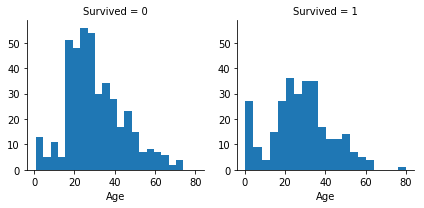

In [1026]:
#Visualizations for Age using FacetGrid! This graphs the histograms of the ages with alive vs dead 
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins = 20);
#we can definitely infer some kind of relationship here, so we should use "Age"

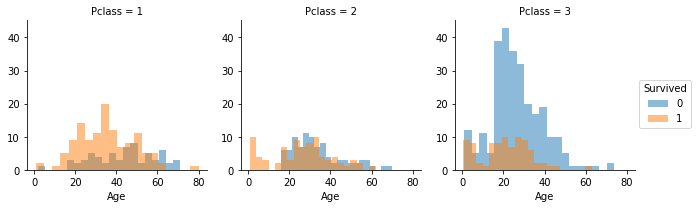

In [1027]:
#Now we are looking at the distribution of ages, in regards to Pclass, and looking at those survival rates 
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#we can definitely infer some kind of relationship here, so we should use "Pclass"

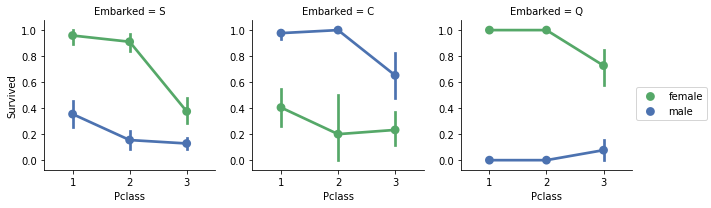

In [1028]:
#Now we can take a look at embarked, and look at how the survival rates change with respect to Pclass and Sex
grid = sns.FacetGrid(train_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
#Add both Sex and Embarked to our model training! 

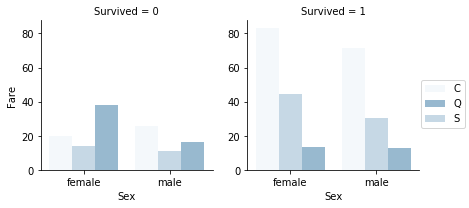

In [1029]:
#Now, let's look at Fare

grid = sns.FacetGrid(train_df, col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', 'Embarked', alpha=.5, ci=None)
grid.add_legend()

#There seems to be a correlation with Fare as well! 

# Now, let's clean our dataset and make it ready for modeling!

In [1030]:
#because we know and have uploaded our test data.. we will try to 
#perform operations on both training and testing datasets together to stay consistent--> this is so when we put in our 
#data into our trained model, we won't have to further iterate the data - it will already be in the same format 
#as the training data! 

#we will create a list of both datasets and just iterate through both of them whenever we make a change
combine = [train_df, test_df]

In [1031]:
#let's delete the "Ticket" and "Cabin" columns because they aren't indicative and are too messy to read! 
combine = [train_df, test_df]
for df in combine: 
    df.drop(['Ticket', 'Cabin'], axis=1, inplace = True)

In [1032]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


In [1033]:
test_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q


# Name Title

In [1034]:
#Now, we want to look at the Name column and extract the Title (the word that ends in a .) Use Regex!

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [1035]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [1036]:
train_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1037]:
#Now we want to replace the very rare ones, with "Rare", and replace the other ones with the most generic ones! 

for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], "Rare")

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [1038]:
#Now let's look at survival rate by Title!! 
Title_survival_rate = train_df.groupby("Title")
Title_survival_rate_ = Title_survival_rate.Survived.mean()
Title_survival_rate_
#Miss and Mrs has the highest survival rate! 

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rare      0.347826
Name: Survived, dtype: float64

In [1039]:
#One more step - let's convert the 5 categories of titles into numbers! And if there are missing values, replace with 0
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(value=0)
    dataset['Title'] = dataset['Title'].astype(int)

In [1040]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [1041]:
#with this, we can now drop both the "Name" and "PassengerId" from the training data 
#we want to keep the PassengerId for the test data!!! --> going to be using this to map the results to each person  
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1) #REMEMBER - TEST STILL HAS PASSENGER ID IN THE DATA!!!! 

In [1042]:
combine = [train_df, test_df] #we have to call this again to update the train_df and test_df datasets! 
train_df.shape, test_df.shape

((891, 9), (418, 9))

# Sex

In [1043]:
#Let's convert our categorical value, Sex, to a binary indicator, we could do this with the get_dummies function, 
#but let's use map in this case! here's the psuedo code for get_dummies

#for dataset in combine: 
    #dataset['Sex'] = dataset.Sex.str.get_dummies()
    #dataset['Sex'] = dataset.Sex.astype(int)

In [1044]:
#using map! 
for dataset in combine: 
    dataset['Sex'] = dataset.Sex.map({"male":0, "female":1})
    dataset['Sex'] = dataset.Sex.astype(int)

In [1045]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


# Age

In [1046]:
#We need to figure out how to replace the NaN Values..

#The most accurate way of guessing missing values is to use other correlated features. In our case we note 
#correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and 
#Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

In [1047]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [1048]:
#Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations. 
#confusing..try to figure this out..
    
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [1049]:
#Now let's create buckets and see how we should split "Age" up in our actual data
#we only use this on the train data, because we want to find the best bins for both of our datasets!
train_df['AgeBand'] = pd.cut(train_df.Age, 5)

In [1050]:
#Let's group by AgeBand and make sure Survival Rate differs!
AgeBandData = train_df.groupby("AgeBand").Survived.mean()
AgeBandData

AgeBand
(-0.08, 16.0]    0.550000
(16.0, 32.0]     0.337374
(32.0, 48.0]     0.412037
(48.0, 64.0]     0.434783
(64.0, 80.0]     0.090909
Name: Survived, dtype: float64

In [1051]:
#Lets replace Age with ordinals(0 to 4) based on these bands. We will use the .loc function to set values! 
for dataset in combine: 
    dataset.loc[dataset['Age'] <= 16, "Age"] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), "Age"] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), "Age"] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), "Age"] = 3
    dataset.loc[dataset['Age'] > 64, "Age"] = 4
    
train_df.head(5)    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [1052]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [1053]:
#Now, we can drop the AgeBand
train_df.drop("AgeBand", axis=1, inplace=True)
combine = [train_df, test_df]

# Family Size

In [1054]:
#we are going to aggregate SibSp & Parch, to calcualte total family size. We will +1 to this sum (because if
#you are by yourself, you're still a family of 1. 
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
 #let's see how diff family size affects survivial 

FamilySize = train_df.groupby("FamilySize")
FamilySizeSurvival = FamilySize.Survived.mean()
FamilySizeSurvival

#Note how the jump from 1 - 2 is HUGE. Let's make a new variable with whether someone is alone of not

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [1055]:
#create a new column that is 0 for not alone, and 1 for alone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [1056]:
#Now let's look at Alone Vs NotAlone survival rates
IsAloneData = train_df.groupby("IsAlone")
IsAloneMean = IsAloneData.Survived.mean()
IsAloneMean

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [1057]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,1,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,1,1,1
3,895,3,0,1,0,0,8.6625,S,1,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0


In [1058]:
for dataset in combine: 
    dataset.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace = True)

In [1059]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


# Creating a new variable (Pclass * Age)

In [1060]:
for dataset in combine: 
    dataset['Age*Class'] = dataset['Pclass'] * dataset['Age']

In [1061]:
train_df.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.25,S,1,0,3


# Changing Embarked Variable to Numeric Values

In [1062]:
#find the most common port and replace NaN with that
freq_port = train_df.Embarked.mode()[0]
freq_port

for dataset in combine: 
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [1063]:
#now we are going to convert the variables to numbers (0, 1, 2)

In [1064]:
embark_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in combine: 
    dataset['Embarked'] = dataset['Embarked'].map(embark_mapping).astype(int)

In [1065]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


# Fare

In [1066]:
#there's one Nan value for Fare... let's take care of it by implementing the mode into that place
freq_fare = test_df.Fare.mode()[0]
freq_fare

test_df.Fare.fillna(value=freq_fare, inplace=True)

In [1067]:
#Now let's do the same thing we did with Age Band... and group them into numbers! 
#we can't use pd.cut, b/c there's a huge outlier in $512.. pd.qcut --> splits the data in quantiles! 
train_df['FareBand'] = pd.qcut(train_df.Fare, 4)
train_df.FareBand.unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [1068]:
#now let's take these bins and bucket them into numbers 
for dataset in combine: 
    dataset.loc[dataset['Fare'] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), "Fare"] = 2
    dataset.loc[dataset['Fare'] > 31, "Fare"] = 3
    dataset['Fare'] = dataset.Fare.astype(int)
    
train_df.head(5)  

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,0,0,1,0,3,"(-0.001, 7.91]"
1,1,1,1,2,3,1,3,0,2,"(31.0, 512.329]"
2,1,3,1,1,1,0,2,1,3,"(7.91, 14.454]"
3,1,1,1,2,3,0,3,0,2,"(31.0, 512.329]"
4,0,3,0,2,1,0,1,1,6,"(7.91, 14.454]"


In [1070]:
#Now, let's drop FareBand!
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]


In [1071]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


# MODEL BUILDING!!! 

In [1078]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df.Survived 
X_test = test_df.drop('PassengerId', axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [1088]:
#Let's jump straight to Random Forest - we know it's the best already :)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)


Y_pred = random_forest.predict(X_test)

#Let's calculate the score of our training data!! the .score calculate the confidence score!! 
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.640000000000001

In [1089]:
#Let's calculate the score of our test data!
acc_random_forest = round(random_forest.score(X_test, Y_pred) * 100, 2)
acc_random_forest
#NOT BAD!! 

100.0

In [1091]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
